In [2]:
import numpy as np 
import pandas as pd
import matplotlib as plt

__Создание искусственного датасета на основе статьи [Tinkoff](https://vc.ru/tinkoff_invest/257662-molodye-i-derzkie-tinkoff-investicii-sostavili-portret-novogo-millionera)__

После изучения данной [статьи](https://smart-lab.ru/blog/722471.php) берем за основу кол-во активных юзеров 1 427 621.
Доля Тинькофф на этом рынке - 40%. Доля юзеров со счетом от 1 до 5 млн рублей составляет 4.7% ([данные ЦБ](https://cbr.ru/analytics/rcb/broker_market/))

__Заводим искусственных юзеров__

In [3]:
id_list = np.arange(1, 25001, 1)

In [4]:
id_list

array([    1,     2,     3, ..., 24998, 24999, 25000])

In [7]:
# 25 000 юзеров - вполне достаточно. 
# Строчка ниже - распределение по гендерному признаку.

In [8]:
men_per = 0.866
women_per = 0.134

In [9]:
shape = len(id_list)

In [10]:
shape

25000

In [11]:
percentile = [men_per, women_per]

__SEX__

In [12]:
sex_value = [1, 0]

In [13]:
data = dict()

In [14]:
for i in range(len(id_list)): 
    data[id_list[i]] = np.random.choice(sex_value, p=percentile)

In [15]:
ser = pd.Series(data)

In [16]:
ser

1        1
2        1
3        1
4        1
5        0
        ..
24996    1
24997    1
24998    0
24999    1
25000    1
Length: 25000, dtype: int64

__HEIGHT__

In [17]:
# распределение по возрастному признаку. 

In [18]:
general_height = ['18-28', '28-38', '38-48', '48+']

In [19]:
height_percent = [0.037, 0.365, 0.389, 0.209]

In [20]:
for i in range(len(id_list)): 
    data[id_list[i]] = np.random.choice(general_height, p=height_percent)

In [21]:
ser2 = pd.Series(data)

In [22]:
df = pd.DataFrame({'sex': ser, 'height': ser2})

In [23]:
df.head()

,sex,height
1,1,48+
2,1,28-38
3,1,48+
4,1,38-48
5,0,48+


In [24]:
df.sex.value_counts()

1    21639
0     3361
Name: sex, dtype: int64

In [25]:
df.height.value_counts()

38-48    9727
28-38    9158
48+      5225
18-28     890
Name: height, dtype: int64

In [26]:
#Комментарий: ну что же, реверс-инжиниринг данных хорошо идет, двигаемся дальше...

__Marital status__

In [27]:
status = ['married', 'not_married']

In [28]:
status_percent = [0.55, 0.45]

In [29]:
# для простоты работы создадим функцию, которая будет принимать список из вероятностей признака (prob_feature) и 
# сам признак (feature_list), а также id_list.

# Оставим поэтапную обработку добора фичей, чтобы вслучае каких-либо обстоятельств мы могли добавить или удалить признак.

In [30]:
def get_series(feature_list, prob_feature, id_feature_list): 
    
    """"
    
    feture_list -> (List) - Данные признака, который хотим восстановить
    prob_feature -> (List) - Вероятность этого признака
    id_feature_list -> (List) - id_list синтетических юзеров
    
    """
    
    data = dict()
    for i in range(len(id_feature_list)): 
        data[id_feature_list[i]] = np.random.choice(feature_list, p=prob_feature)
    ser_feature = pd.Series(data)
    
    return ser_feature

In [31]:
mar_status = get_series(status, status_percent, id_list)

In [32]:
df['marital_status'] = mar_status

In [33]:
df.head()

,sex,height,marital_status
1,1,48+,married
2,1,28-38,married
3,1,48+,not_married
4,1,38-48,not_married
5,0,48+,married


In [34]:
#как всегда проверяем сами себя: 
df.marital_status.value_counts()

married        13815
not_married    11185
Name: marital_status, dtype: int64

__Education__

In [35]:
education = ['high_education', 'medium_education', 'second_high_education', 'academic_credential']
education_percent = [0.8, 0.06, 0.11, 0.03]

In [36]:
education_status = get_series(education, education_percent, id_list)

In [37]:
df['education_status'] = education_status

In [38]:
df.head()

,sex,height,marital_status,education_status
1,1,48+,married,high_education
2,1,28-38,married,second_high_education
3,1,48+,not_married,high_education
4,1,38-48,not_married,second_high_education
5,0,48+,married,high_education


In [39]:
df.education_status.value_counts()

high_education           19969
second_high_education     2773
medium_education          1520
academic_credential        738
Name: education_status, dtype: int64

__Children__

In [40]:
child = ['children', 'no_children']

In [41]:
children_percent = [0.5, 0.5]

In [42]:
children_status = get_series(child, children_percent, id_list)

In [43]:
df['children_status'] = children_status

In [44]:
df.head()

,sex,height,marital_status,education_status,children_status
1,1,48+,married,high_education,no_children
2,1,28-38,married,second_high_education,children
3,1,48+,not_married,high_education,no_children
4,1,38-48,not_married,second_high_education,no_children
5,0,48+,married,high_education,children


In [45]:
df.children_status.value_counts()

no_children    12576
children       12424
Name: children_status, dtype: int64

__Risk profile__ 

In [46]:
# Уровень риска, который указывает инвестор в анкете. 

In [47]:
risk_profile = ['high_risk', 'medium_risk', 'low_risk']

In [48]:
risk_percent = [0.6, 0.36, 0.04]

In [49]:
risk_status = get_series(risk_profile, risk_percent, id_list)

In [50]:
df['risk_status'] = risk_status

In [51]:
df.head()

,sex,height,marital_status,education_status,children_status,risk_status
1,1,48+,married,high_education,no_children,medium_risk
2,1,28-38,married,second_high_education,children,low_risk
3,1,48+,not_married,high_education,no_children,medium_risk
4,1,38-48,not_married,second_high_education,no_children,medium_risk
5,0,48+,married,high_education,children,medium_risk


In [52]:
df.risk_status.value_counts()

high_risk      15021
medium_risk     8933
low_risk        1046
Name: risk_status, dtype: int64

__Location__

In [53]:
#Город, в котором проживает инвестор

In [54]:
city = ['Moscow', 'Sain-Petersburg', 'Krasnodar', 'Moscow_region', 'Tatarstan',
        'Rostov','Samara', 'Ekaterinburg', 'Volgograd', 'Novosibirsk']

In [55]:
citizens = np.array([12678, 5398, 933, 7708, 1129, 1138, 1157, 1494, 1009, 1626])

In [56]:
citizens_sum = citizens.sum()

In [57]:
city_percent = [round(citizens[i]/citizens_sum, 3) for i in range(len(city))] 

In [58]:
city_percent

[0.37, 0.158, 0.027, 0.225, 0.033, 0.033, 0.034, 0.044, 0.029, 0.047]

In [59]:
city_percent=np.array([city_percent])

In [60]:
assert city_percent.sum()==1.

In [61]:
city_percent.sum()

1.0

In [62]:
location_status = get_series(city, city_percent.flatten(), id_list)

In [63]:
df['location_status'] = location_status

In [64]:
df.head()

,sex,height,marital_status,education_status,children_status,risk_status,location_status
1,1,48+,married,high_education,no_children,medium_risk,Ekaterinburg
2,1,28-38,married,second_high_education,children,low_risk,Moscow
3,1,48+,not_married,high_education,no_children,medium_risk,Moscow
4,1,38-48,not_married,second_high_education,no_children,medium_risk,Rostov
5,0,48+,married,high_education,children,medium_risk,Moscow


In [65]:
df.location_status.value_counts()

Moscow             9286
Moscow_region      5710
Sain-Petersburg    3931
Novosibirsk        1158
Ekaterinburg       1066
Samara              847
Rostov              817
Tatarstan           791
Volgograd           727
Krasnodar           667
Name: location_status, dtype: int64

__Activity__

In [66]:
# Занятость

In [67]:
activity = ['retirement', 'not_working', 'employee', 'own_business', 'senior_officer']

In [68]:
activity_percent = [0.02, 0.11, 0.2, 0.31, 0.36]

In [69]:
activity_status = get_series(activity, activity_percent, id_list)

In [70]:
df['activity_status'] = activity_status 

In [71]:
df.head()

,sex,height,marital_status,education_status,children_status,risk_status,location_status,activity_status
1,1,48+,married,high_education,no_children,medium_risk,Ekaterinburg,employee
2,1,28-38,married,second_high_education,children,low_risk,Moscow,senior_officer
3,1,48+,not_married,high_education,no_children,medium_risk,Moscow,own_business
4,1,38-48,not_married,second_high_education,no_children,medium_risk,Rostov,own_business
5,0,48+,married,high_education,children,medium_risk,Moscow,own_business


In [72]:
df.activity_status.value_counts()

senior_officer    9034
own_business      7723
employee          5016
not_working       2722
retirement         505
Name: activity_status, dtype: int64

__Deposit amount__

In [73]:
# Размер средств на счете

In [74]:
deposit_mln = ['1-5', '5-10', '10-20']

In [75]:
depo_perc = [0.6, 0.2, 0.2]

In [76]:
depo_status = get_series(deposit_mln, depo_perc, id_list)

In [77]:
df['depo_status'] = depo_status 

In [78]:
df.head()

,sex,height,marital_status,education_status,children_status,risk_status,location_status,activity_status,depo_status
1,1,48+,married,high_education,no_children,medium_risk,Ekaterinburg,employee,1-5
2,1,28-38,married,second_high_education,children,low_risk,Moscow,senior_officer,5-10
3,1,48+,not_married,high_education,no_children,medium_risk,Moscow,own_business,5-10
4,1,38-48,not_married,second_high_education,no_children,medium_risk,Rostov,own_business,1-5
5,0,48+,married,high_education,children,medium_risk,Moscow,own_business,1-5


In [79]:
df.depo_status.value_counts()

1-5      15122
5-10      4979
10-20     4899
Name: depo_status, dtype: int64

In [80]:
# Датасет готов. Его можно будет дополнять, это mvp от которого будем отталкиваться. Сохраним его в csv.

In [81]:
file_name = 'users_initial.csv'

In [82]:
df.to_csv(file_name, encoding='utf-8', index=False)

__Short EDA__ 

In [83]:
df = pd.read_csv('users_initial.csv')

In [84]:
df.head()

,sex,height,marital_status,education_status,children_status,risk_status,location_status,activity_status,depo_status
0,1,48+,married,high_education,no_children,medium_risk,Ekaterinburg,employee,1-5
1,1,28-38,married,second_high_education,children,low_risk,Moscow,senior_officer,5-10
2,1,48+,not_married,high_education,no_children,medium_risk,Moscow,own_business,5-10
3,1,38-48,not_married,second_high_education,no_children,medium_risk,Rostov,own_business,1-5
4,0,48+,married,high_education,children,medium_risk,Moscow,own_business,1-5


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sex               25000 non-null  int64 
 1   height            25000 non-null  object
 2   marital_status    25000 non-null  object
 3   education_status  25000 non-null  object
 4   children_status   25000 non-null  object
 5   risk_status       25000 non-null  object
 6   location_status   25000 non-null  object
 7   activity_status   25000 non-null  object
 8   depo_status       25000 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.7+ MB


In [86]:
# Сначала визуализируем, затем обработаем наши данные.

__SEX__

<AxesSubplot:>

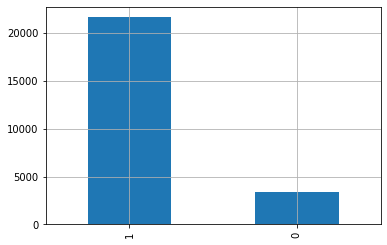

In [87]:
df.sex.value_counts().plot(kind='bar', grid = True)

__HEIGHT__

<AxesSubplot:>

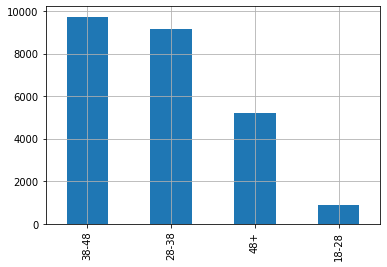

In [88]:
df.height.value_counts().plot(kind='bar', grid = True)

__MARITAL STATUS__

<AxesSubplot:>

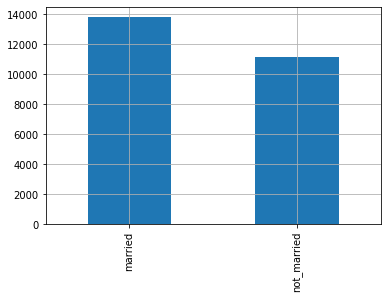

In [89]:
df.marital_status.value_counts().plot(kind='bar', grid = True)

__EDUCATION STATUS__

<AxesSubplot:>

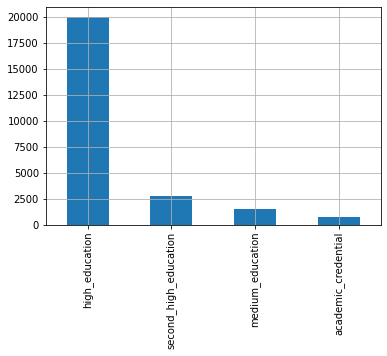

In [90]:
df.education_status.value_counts().plot(kind='bar', grid = True)

__CHILDREN STATUS__

<AxesSubplot:>

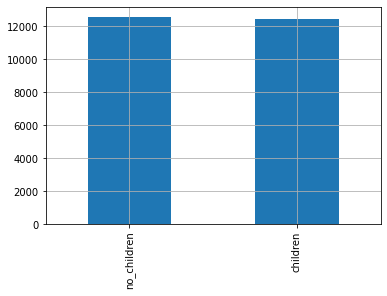

In [91]:
df.children_status.value_counts().plot(kind='bar', grid = True)

__RISK STATUS__

<AxesSubplot:>

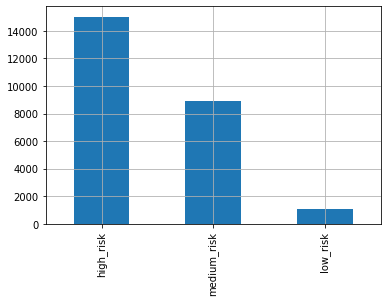

In [92]:
df.risk_status.value_counts().plot(kind='bar', grid = True)

__LOCATION STATUS__

<AxesSubplot:>

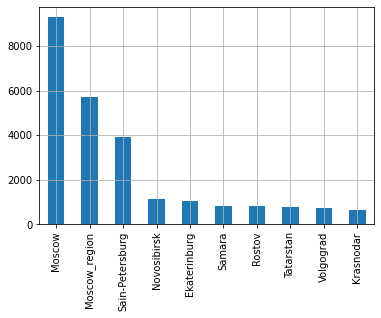

In [93]:
df.location_status.value_counts().plot(kind='bar', grid = True)

__ACTIVITY STATUS__

<AxesSubplot:>

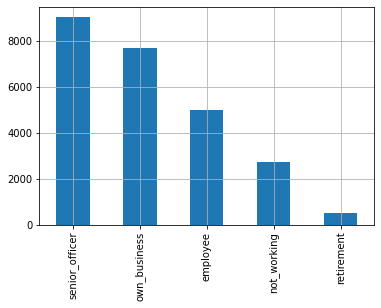

In [94]:
df.activity_status.value_counts().plot(kind='bar', grid = True)

__DEPO STATUS__

<AxesSubplot:>

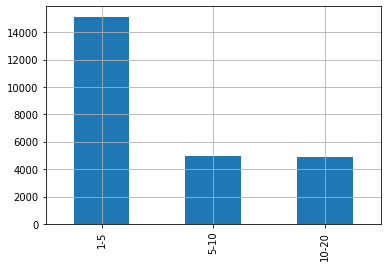

In [95]:
df.depo_status.value_counts().plot(kind='bar', grid = True)

__INITIAL DATASET TREATMENT__

In [96]:
height_dict = {'18-28': 23,
               '28-38': 43,
               '38-48': 53,
               '48+': 60}

activity_dict = {'own_business': 5, 'senior_officer': 4, 'not_working': 3, 'employee': 2,
                 'retirement': 1}

depo_dict = {'1-5': 2.5,
             '5-10': 7.5,
             '10-20': 15}

city_dict = {'Moscow': 1,
             'Sain-Petersburg': 2,
             'Krasnodar': 3,
             'Moscow_region': 4,
             'Tatarstan': 5,
             'Rostov': 6,
             'Samara': 7,
             'Ekaterinburg': 8,
             'Volgograd': 9,
             'Novosibirsk': 10}

risk_profile_dict = {'high_risk': 1,
                     'medium_risk': 2,
                     'low_risk': 3}

child_dict = {'children': 1,
              'no_children': 0}

education_dict = {'high_education': 1,
                  'medium_education': 2,
                  'second_high_education': 3,
                  'academic_credential':4}

status_dict = {'married': 1,
               'not_married': 0}

In [97]:
df['height_ord'] = df.height.map(height_dict)
df['marital_status_ord'] = df.marital_status.map(status_dict)
df['education_status_ord'] = df.education_status.map(education_dict)
df['children_status_ord'] = df.children_status.map(child_dict)
df['risk_status_ord'] = df.risk_status.map(risk_profile_dict)
df['location_status_ord'] = df.location_status.map(city_dict)
df['activity_status_ord'] = df.activity_status.map(activity_dict)
df['depo_status_ord'] = df.depo_status.map(depo_dict)

In [98]:
# со временем это все можно обернуть в функцию и автоматизировать мэппинг через цикл. 

In [99]:
df.head()

,sex,height,marital_status,education_status,children_status,risk_status,location_status,activity_status,depo_status,height_ord,marital_status_ord,education_status_ord,children_status_ord,risk_status_ord,location_status_ord,activity_status_ord,depo_status_ord
0,1,48+,married,high_education,no_children,medium_risk,Ekaterinburg,employee,1-5,60,1,1,0,2,8,2,2.5
1,1,28-38,married,second_high_education,children,low_risk,Moscow,senior_officer,5-10,43,1,3,1,3,1,4,7.5
2,1,48+,not_married,high_education,no_children,medium_risk,Moscow,own_business,5-10,60,0,1,0,2,1,5,7.5
3,1,38-48,not_married,second_high_education,no_children,medium_risk,Rostov,own_business,1-5,53,0,3,0,2,6,5,2.5
4,0,48+,married,high_education,children,medium_risk,Moscow,own_business,1-5,60,1,1,1,2,1,5,2.5


In [100]:
df_treated = df[['sex', 'height_ord', 'marital_status_ord',
                 'education_status_ord', 'children_status_ord', 'risk_status_ord',
                 'location_status_ord', 'depo_status_ord', 'activity_status_ord']]

In [101]:
df_treated.head()

,sex,height_ord,marital_status_ord,education_status_ord,children_status_ord,risk_status_ord,location_status_ord,depo_status_ord,activity_status_ord
0,1,60,1,1,0,2,8,2.5,2
1,1,43,1,3,1,3,1,7.5,4
2,1,60,0,1,0,2,1,7.5,5
3,1,53,0,3,0,2,6,2.5,5
4,0,60,1,1,1,2,1,2.5,5


In [102]:
#сохраним обновленный датасет для дальнейшей работы с ним

In [103]:
file_name_tr = 'users_treated.csv'

In [104]:
df.to_csv(file_name_tr, encoding='utf-8', index=False)